In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("../csv/data_table.csv")
df

,CAB285000006,CAB285000007,CAB285000008,CAB285000009,CAB285000010,CAB285000011,CAB285000012,CAB285000013,CAB285000024,CAB285000025,CAB285000293,CAB285000294,total_average
0,796.918719,764.947880,521.320485,514.547072,538.939394,625.515038,837.389861,655.078697,991.523913,881.778357,804.034519,873.218513,733.767704
1,793.815318,769.053086,511.359846,542.199461,590.789880,735.798422,847.333515,674.347344,1150.791498,1082.750939,753.559748,915.514825,780.609490
2,770.970349,735.966148,551.102027,537.877256,699.436142,787.330587,926.645785,694.722884,1213.073171,1213.046575,909.930876,1041.282119,840.115327
3,796.588687,802.998421,587.739851,705.513652,684.777651,927.331453,924.511318,716.266862,1251.663690,1248.347664,904.608905,986.392473,878.061719


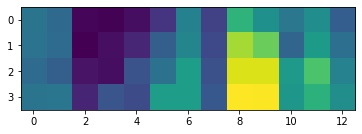

In [3]:
plt.imshow(df)

In [4]:
# 데이터 칼럼,인덱스 이름 변경
df.index = ["Stage1", "Stage2", "Stage3", "Stage4"]
df.columns = ["11(6)","11(7)","12(8)","12(9)","13(10)","13(11)","14(12)","14(13)","24(24)","24(25)","81(293)","81(294)", "TOTAL AVERAGE"]
df.columns.names = ["bus_num(routeid)"]

## Average of dispatch intervals by time zone

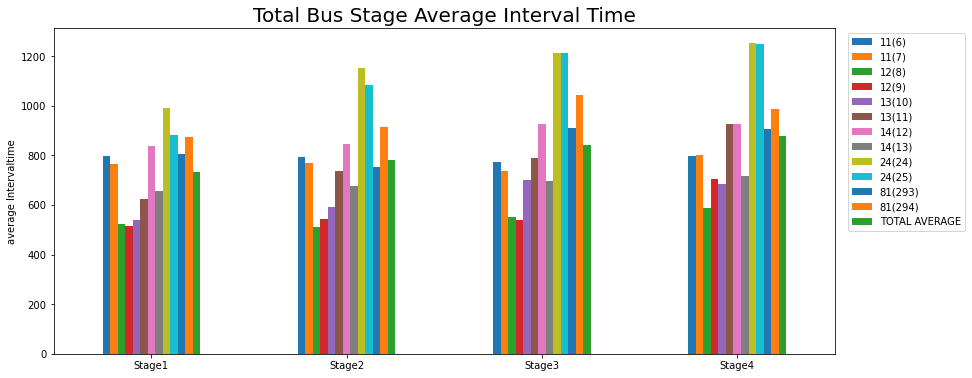

In [5]:
# total
ax = df.plot(kind="bar", width=0.5,figsize=(14,6))
plt.title("Total Bus Stage Average Interval Time", fontsize=20)
plt.ylabel("average Intervaltime")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
plt.savefig('../image/bus_average_Interval_time_grap_total.png',dpi=300,bbox_inches='tight') # 그래프 이미지로 저장

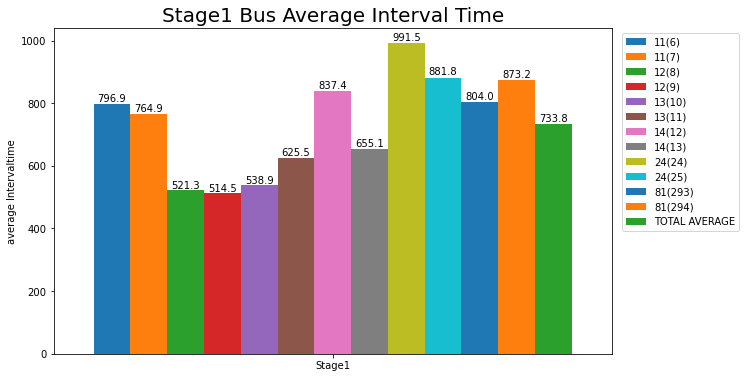

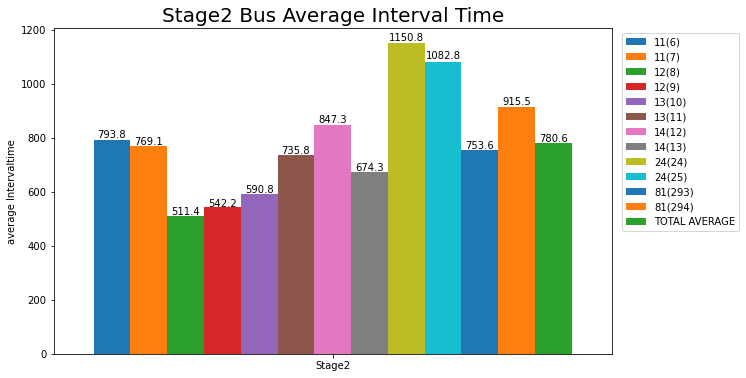

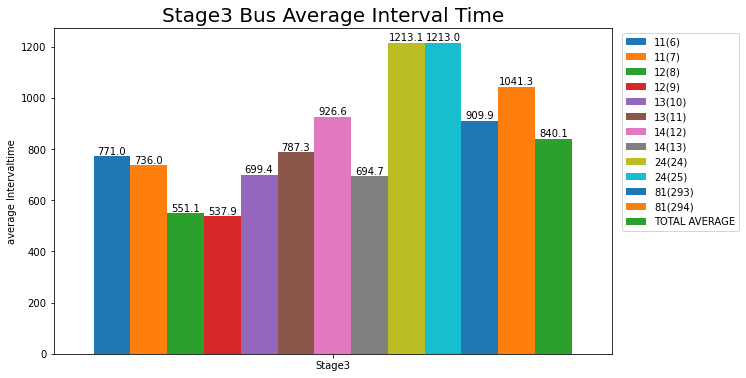

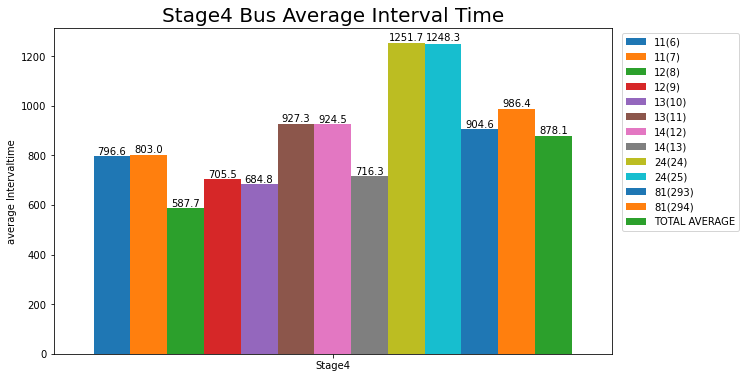

In [6]:
# stages
for stage in df.index:
    #print(stage)
    s = df.loc[[stage],:]
    ax = s.plot(kind="bar", width=3.0, figsize=(10,6))
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')
    plt.title(stage+" Bus Average Interval Time", fontsize=20)
    plt.ylabel("average Intervaltime")
    plt.xticks(rotation=0)

    plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')

    plt.savefig('../image/bus_average_Interval_time_grap_'+stage+'.png',dpi=140, bbox_inches='tight')

In [7]:
path =  "../mine"
file_list = os.listdir(path)
print(file_list)

['CAB285000006.csv', 'CAB285000007.csv', 'CAB285000008.csv', 'CAB285000009.csv', 'CAB285000010.csv', 'CAB285000011.csv', 'CAB285000012.csv', 'CAB285000013.csv', 'CAB285000024.csv', 'CAB285000025.csv', 'CAB285000293.csv', 'CAB285000294.csv']


## Comparison of dispatch intervals by bus

In [8]:
route_info = pd.read_csv('../csv/route_info.csv')
interval_times = route_info['intervaltime']

In [9]:
df = df.drop("TOTAL AVERAGE", axis =1)

In [10]:
time_gap_df = pd.DataFrame(columns=["specified time", "actual Time"])

In [11]:
for i, c in enumerate(df.columns):
    time_gap_df.loc[i] = [interval_times[i], df[c].mean()/60]

time_gap_df.index = ["11(6)","11(7)","12(8)","12(9)","13(10)","13(11)","14(12)","14(13)","24(24)","24(25)","81(293)","81(294)"]
time_gap_df   

,specified time,actual Time
11(6),10.0,13.159554
11(7),10.0,12.804023
12(8),7.0,9.048009
12(9),7.0,9.583906
13(10),11.0,10.474763
13(11),11.0,12.816565
14(12),10.0,14.732835
14(13),10.0,11.418399
24(24),20.0,19.196051
24(25),20.0,18.441348


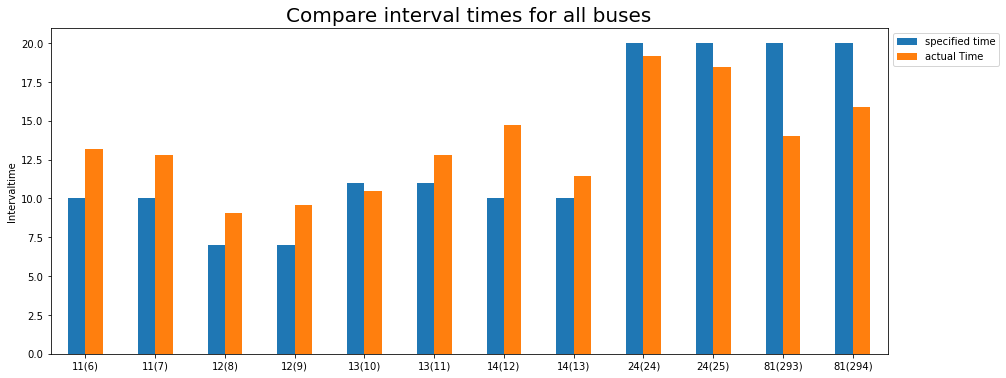

In [12]:
ax = time_gap_df.plot(kind="bar", width=0.5,figsize=(15,6), rot=0)
plt.title("Compare interval times for all buses", fontsize=20)
plt.ylabel("Intervaltime")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('../image/Compare_interval_times_for_all_buses.png',dpi=300,bbox_inches='tight')

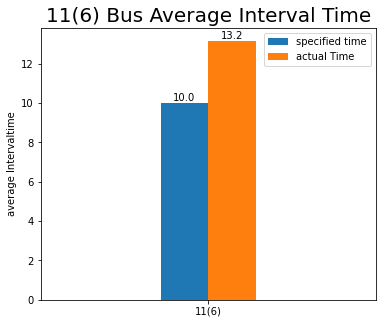

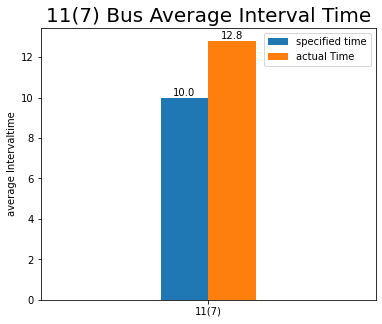

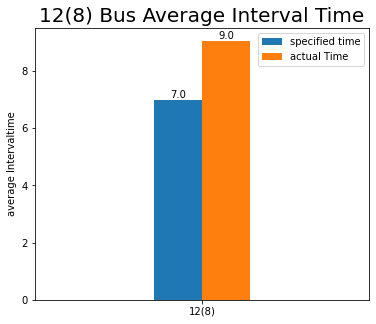

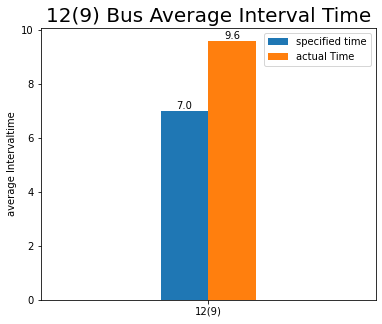

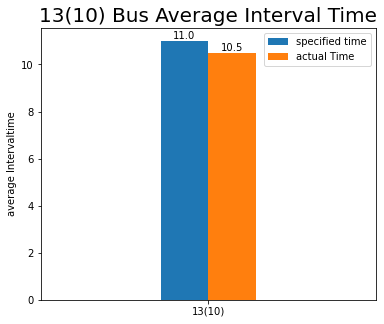

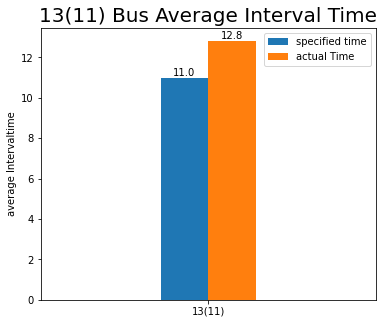

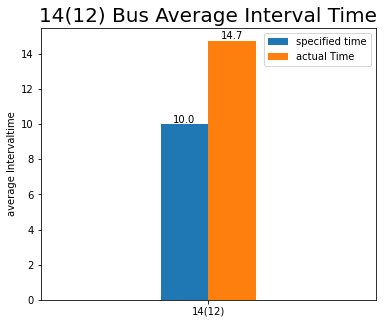

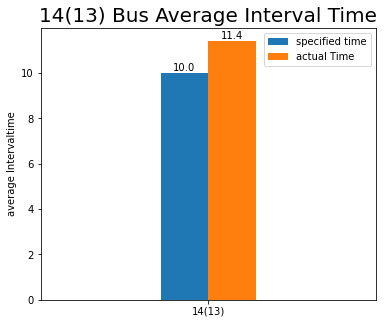

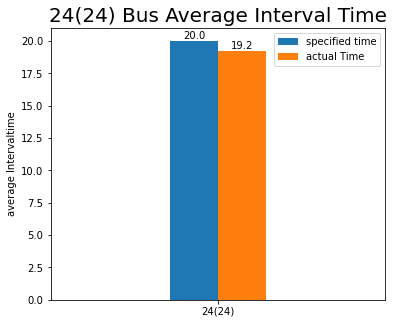

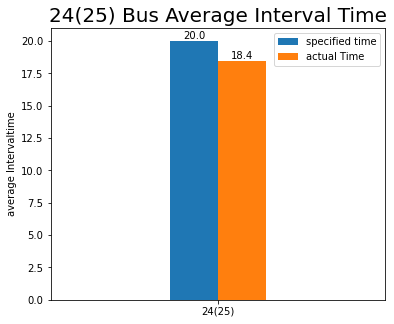

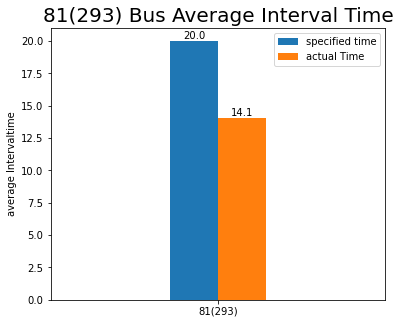

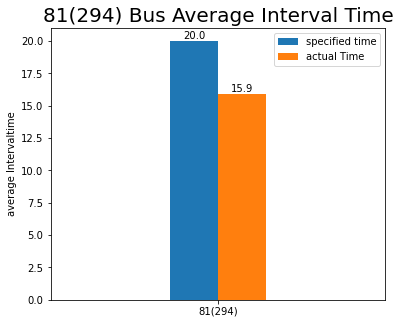

In [13]:
# route
for route in time_gap_df.index:
    #print(route)
    s = time_gap_df.loc[[route],:]
    ax = s.plot(kind="bar", width=0.2, figsize=(6,5))
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')
    plt.title(route+" Bus Average Interval Time", fontsize=20)
    plt.ylabel("average Intervaltime")
    plt.xticks(rotation=0)

    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.savefig('../image/Compare_interval_times_for_'+route+'.png',dpi=130,bbox_inches='tight')
    

## analysis interval impact stage

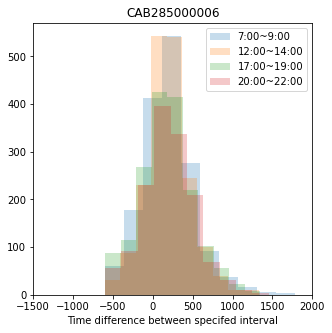

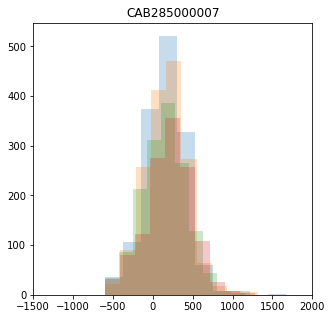

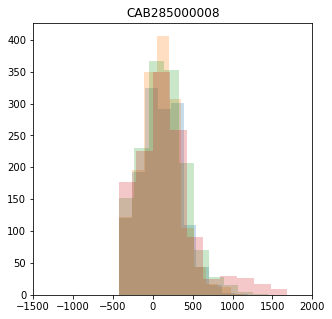

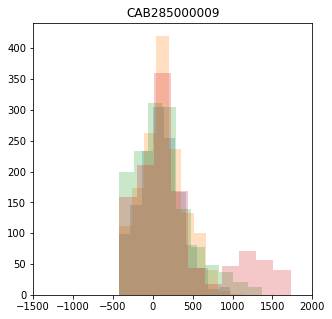

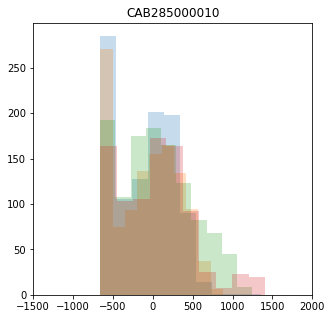

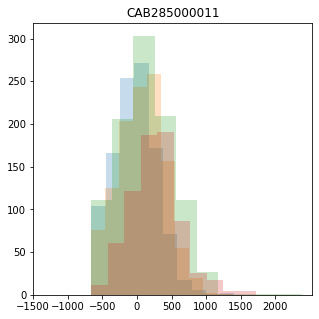

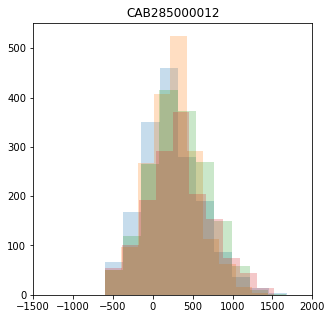

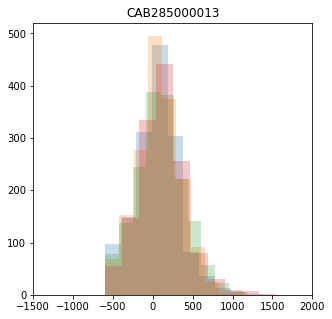

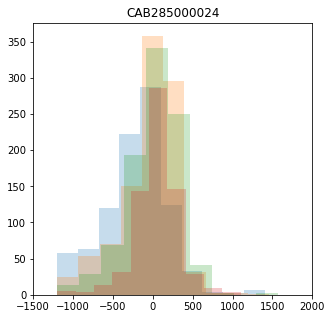

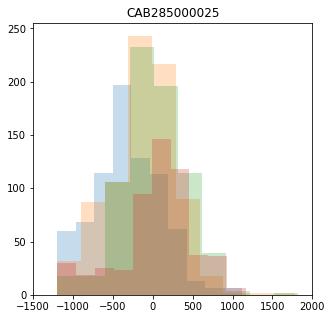

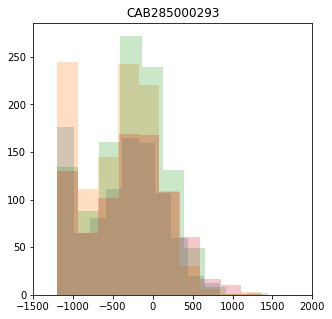

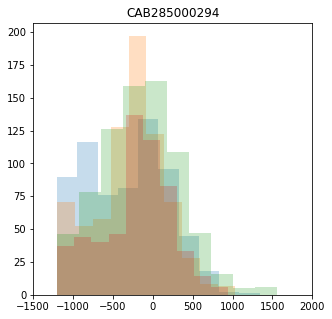

In [14]:
route_info = pd.read_csv('../csv/route_info.csv')
bus_timegap_file_list = os.listdir('../mine')

interval_times = route_info['intervaltime']
for i, file in enumerate(bus_timegap_file_list):
    bus = pd.read_csv('../mine/' + file)
    #print(bus)
    bus_intervaltime = interval_times[i] # 현재 버스의 배차 간격 추출
    
    bus_interval_comp = list()
    
    for stage in range(4):
        time_gap_str = bus.iloc[stage, 1] # time gap 추출
        #print(time_gap_str)
        time_gap = list(map(float, time_gap_str[1:-1].split(', '))) # str -> float형 리스트로 변환
        
        for gap in range(len(time_gap)):
            time_gap[gap] -= bus_intervaltime*60
        
        bus_interval_comp.append(time_gap)
       
    plt.subplots(figsize=(5, 5))
    
    plt.hist(bus_interval_comp[0], alpha=0.25)
    plt.hist(bus_interval_comp[1], alpha=0.25)
    plt.hist(bus_interval_comp[2], alpha=0.25)
    plt.hist(bus_interval_comp[3], alpha=0.25)
    
    plt.xticks(np.arange(-1500, 2500, 500))
    
    plt.title(file[:-4])
    
    if i == 0:
        plt.xlabel('Time difference between specifed interval')
        plt.legend(['7:00~9:00', '12:00~14:00', '17:00~19:00', '20:00~22:00']) # 첫번째 그래프에 어느 것이 malignant인지, benign인지 표시
    
    plt.savefig('../image/analysis_interval_impact_'+file[:-4]+'.png') # 그래프 이미지로 저장
